# Derivación numérica: diferencias finitas

- **Daniel Martínez** (@danmarurr)

### NOTA
Este notebook se iniciará en la clase; la resolución completa debe ser enviada como "Tarea3.ipynb", desde su carpeta de tareas. Se puede hacer en equipo, con un máximo de dos personas. Si se hace en equipo, incluyan ambos nombres de manera clara.

En este notebook, implementarán funciones que calculan la derivada numéricamente, de una función $f(x)$ en un punto $x_0$ dado.

## Derivada *derecha*

Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la definición de la derivada:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

que requiere la especificación de `h`. (Este método se conoce por el nombre de *diferencias finitas*.)

A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). (Para ser concretos, obtengan la derivada de la función de prueba $f(x) = 3x^3-2$, en $x_0=1$.) Dibujen, como función de $h$, el error de su cálculo (usar escala logarítmica en ambos ejes puede ser una buena idea). A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada? 


In [1]:
using PyPlot

In [2]:
#Definamos la función para trabajar
f(x) = 3x^3 - 2
#Definamos la función que calcula la derivada lateral de una función arbitraria
"""
`derivada_derecha(f, h, x_0 =0.0)`

Calcula la derivada de la función `f` en el punto `x_0` empleando 
diferencias finitas laterales, usando el valor h -> 0.

`x_0` y `h` deben ser un números reales (`h != 0`)
"""
function derivada_derecha{T<:Real}(f::Function, h::T, x_0 = 0.0)
    @assert h != 0 "h tiene que ser distinto de cero"
    (f(x_0 + h) - f(x_0))/h
end

derivada_derecha (generic function with 2 methods)

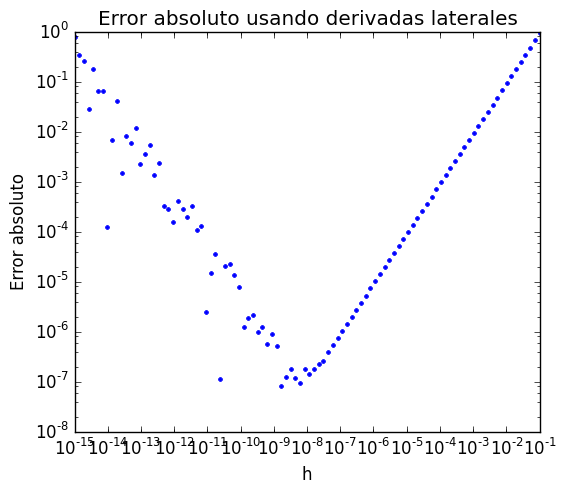

PyObject <matplotlib.text.Text object at 0x7f32ad592668>

In [9]:
#Definamos el arreglo con los valores de hs
hs = logspace(-15, -1, 100)

#Definamos el arreglo con hs para regresiones lineales
hs2 = logspace(-6, -1, 100)

#Calculando el error absoluto
r1 = Float64[abs(9 - derivada_derecha(f, h, 1)) for h in hs]
l1 = Float64[abs(9 - derivada_derecha(f, h, 1)) for h in hs2]

#Grafiquemos el error absoluto usando derivadas laterales
figure(figsize = (6,5))
loglog(hs,r1, marker =".", linestyle = "")
xlabel("h")
ylabel("Error absoluto")
title("Error absoluto usando derivadas laterales")

In [19]:
#Haciendo regresión lineal para derivadas laterales
b1, m1 = linreg(log(hs2), log(l1))

2-element Array{Float64,1}:
 2.21059
 1.00128

### Conclusiones con derivadas laterales

Notamos que el error decrece de forma lineal conforme $h \to 0$, cuando $h \sim 10^{-8}$ el error comienza a crecer de forma lineal, lo cual no gusta pues formalmente el error debería tender a cero.

## Derivada simétrica

Repitan el ejercicio anterior usando cómo definición de la derivada la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}



In [4]:
#Definamos la función que calcula la derivada central de una función arbitraria
"""
`derivada_central(f, h, x_0 =0.0)`

Calcula la derivada de la función `f` en el punto `x_0` empleando 
diferencias finitas centrales, usando el valor h -> 0.

`x_0` y `h` deben ser un números reales (`h != 0`)
"""
function derivada_central{T<:Real}(f::Function, h::T, x_0 = 0.0)
    @assert h != 0 "h tiene que ser distinto de cero"
    (f(x_0 + h) - f(x_0 - h))/(2h)
end

derivada_central (generic function with 2 methods)

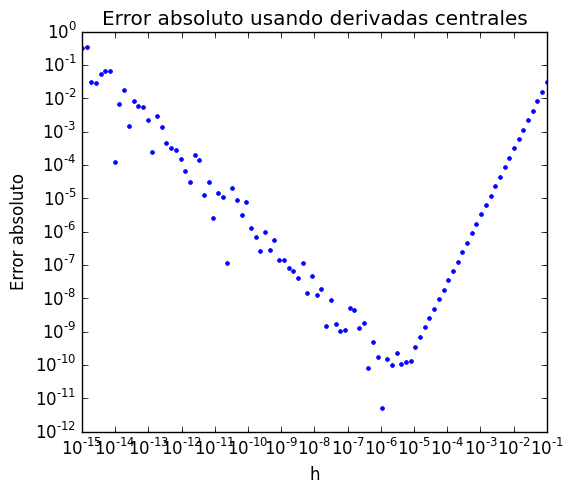

PyObject <matplotlib.text.Text object at 0x7f32ad289da0>

In [13]:

#Calculando el error absoluto
r2 = Float64[abs(9 - derivada_central(f, h, 1)) for h in hs]
l2 = Float64[abs(9 - derivada_central(f, h, 1)) for h in hs2]

#Grafiquemos el error absoluto usando derivadas centrales
figure(figsize = (6,5))
loglog(hs,r2, marker =".", linestyle = "")
xlabel("h")
ylabel("Error absoluto")
title("Error absoluto usando derivadas centrales")

In [18]:
#Haciendo regresión lineal para derivadas centrales
b2, m2 = linreg(log(hs2), log(l2))

2-element Array{Float64,1}:
 0.406195
 1.88164 

### Conclusiones con derivadas centrales

Notamos que el error decrece de forma lineal conforme $h \to 0$, incluso más rápido que con la derivada lateral, pero cuando $h \sim 10^{-6}$ (un poco antes que con la derivada lateral) el error comienza a crecer de forma lineal, que tampoco gusta.

## Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Así, tenemos la definición:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


In [6]:
"""
`derivada_compleja(f, h, x_0 =0.0)`

Calcula la derivada de la función `f` en el punto `x_0` empleando 
diferencias finitas complejas, usando el valor h -> 0.

`x_0` y `h` deben ser un números reales (`h != 0`)
"""
function derivada_compleja{T<:Real}(f::Function, h::T, x_0 = 0.0)
    @assert h != 0 "h tiene que ser distinto de cero"
    imag(f(x_0 + im*h)/h)
end

derivada_compleja (generic function with 2 methods)

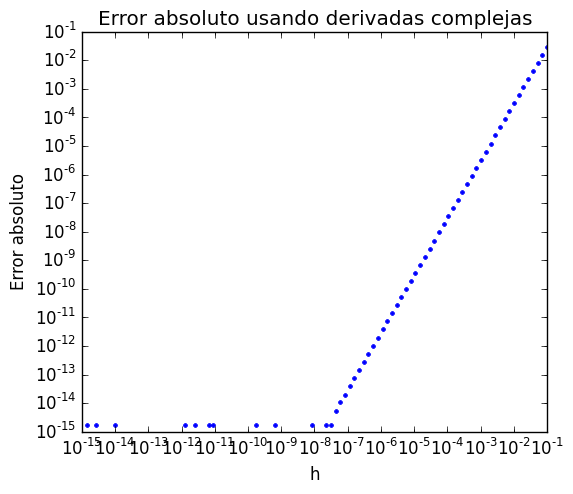

PyObject <matplotlib.text.Text object at 0x7f32ad315048>

In [15]:
#Calculando el error absoluto
r3 = Float64[abs(9 - derivada_compleja(f, h, 1)) for h in hs]
l3 = Float64[abs(9 - derivada_compleja(f, h, 1)) for h in hs2]

#Grafiquemos el error absoluto usando derivadas complejas
figure(figsize = (6,5))
loglog(hs,r3, marker =".", linestyle = "")
xlabel("h")
ylabel("Error absoluto")
title("Error absoluto usando derivadas complejas")

In [16]:
#Haciendo regresión lineal para derivadas centrales
b3, m3 = linreg(log(hs2), log(l3))

2-element Array{Float64,1}:
 1.09861
 2.0    

### Conclusiones con "derivadas complejas"

Notamos que el error decrece de forma lineal conforme $h \to 0$, incluso más rápido que con la derivada central, pero cuando $h \sim 10^{-8}$ (el mismo orden de magnitud que la derivada lateral) el error permanece constante ($ \sim 10^{-15}$)

## Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

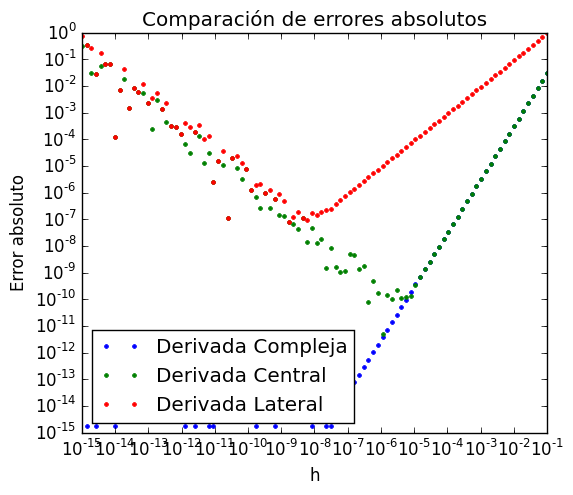

PyObject <matplotlib.legend.Legend object at 0x7f32ad139ef0>

In [22]:
figure(figsize = (6,5))
loglog(hs,r3, marker =".", linestyle = "", label ="Derivada Compleja")
loglog(hs,r2, marker =".", linestyle = "", label ="Derivada Central")
loglog(hs,r1, marker =".", linestyle = "", label ="Derivada Lateral")
xlabel("h")
ylabel("Error absoluto")
title("Comparación de errores absolutos")
legend(loc ="best")

Antes, observemos que las gráficas error vs $h$ se hicieron en escala logarítmica, entonces si se observa un comportamiento lineal se tiene que $ \ln(\text{error}) = m\ln{h} + b $, sacando exponencial en ambos lados de la ecuación se tendrá que:

$$\text{error} = e^bx^m$$

Entonces, si m es grande, el error decrecerá más rápidamente si $h\to 0$

Usando como argumento la comparación el parámetro $m$ asociados a los errores absolutos de cada derivada, tendremos que definitivamente el ganador es la derivada compleja, pues su parámetro $m$ es más grande ($m = 2$) en comparación que los otros ($m = 1.88, 1.001$), más importante aún, tenemos que la derivada compleja alcanza el valor de error más pequeño (error $\sim 10^{-16}$).  Además, su comportamiento es menos incómodo pues el error permanece constante.

- ¿Qué comportamiento de las derivadas en términos de $h$ nos incomoda (en lo más profundo de las entrañas)? ¿A qué se debe esto?

Teóricamente, el valor de la derivada calculada con cualquier método debería aproximarse al valor del límite si $h \to 0$, pero en todo lo anterior observamos que no sucede. En el caso de la derivada central y lateral, el error comienza a crecer si tomamos valores de $h$ suficientemente pequeños, al hacer cálculos con números flotantes tendremos pérdida de cifras significativas, lo cual repercute al realizar la resta $f(x_0 - h) - f(x)$ o $f(x_0 - h) - f(x + h)$, pues cada evaluación tendrá valores muy cercanos entre sí (cancelación catastrófica). Como la derivada compleja no tiene una resta en su cálculo tiene un comportamiento más amigable.